In [34]:
#Import some of the tools I know I will need:
import numpy as np
import pandas as pd
import requests
import zipfile
import io
from datetime import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

%matplotlib inline
sns.set_context("poster")
sns.set_style("whitegrid")


Import data:

In [2]:
csv_folder = '/Users/torrie/ZillowKaggle/'

properties_df = pd.read_csv(csv_folder+'properties_2016.csv')
train_df = pd.read_csv(csv_folder+'train_2016_v2.csv')
samplesubmission_df = pd.read_csv(csv_folder+'sample_submission.csv')


/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(properties_df.shape)


(2985217, 58)
(90275, 3)


Get info about properties_df

In [6]:
properties_df.columns

Index([u'parcelid', u'airconditioningtypeid', u'architecturalstyletypeid',
       u'basementsqft', u'bathroomcnt', u'bedroomcnt', u'buildingclasstypeid',
       u'buildingqualitytypeid', u'calculatedbathnbr', u'decktypeid',
       u'finishedfloor1squarefeet', u'calculatedfinishedsquarefeet',
       u'finishedsquarefeet12', u'finishedsquarefeet13',
       u'finishedsquarefeet15', u'finishedsquarefeet50',
       u'finishedsquarefeet6', u'fips', u'fireplacecnt', u'fullbathcnt',
       u'garagecarcnt', u'garagetotalsqft', u'hashottuborspa',
       u'heatingorsystemtypeid', u'latitude', u'longitude',
       u'lotsizesquarefeet', u'poolcnt', u'poolsizesum', u'pooltypeid10',
       u'pooltypeid2', u'pooltypeid7', u'propertycountylandusecode',
       u'propertylandusetypeid', u'propertyzoningdesc',
       u'rawcensustractandblock', u'regionidcity', u'regionidcounty',
       u'regionidneighborhood', u'regionidzip', u'roomcnt', u'storytypeid',
       u'threequarterbathnbr', u'typeconstructiontyp

In [7]:
properties_df.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [10]:
properties_df.isnull().sum()

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


In [11]:
properties_df.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,...,2647.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,...,278.296562,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,...,369.731508,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,4.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000e+00,3.000000e+00,4.000000,7.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.250000,3.000000e+00,4.000000e+00,4.000000,7.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,1.968890e+05,4.880000e+05,2.015000e+03,3.069180e+05,6.201005e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,2.000000e+01,2.000000e+01,5.000000,1.200000e+01,2.000000e+01,66.0,...,6141.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,99.000000,4.830301e+14


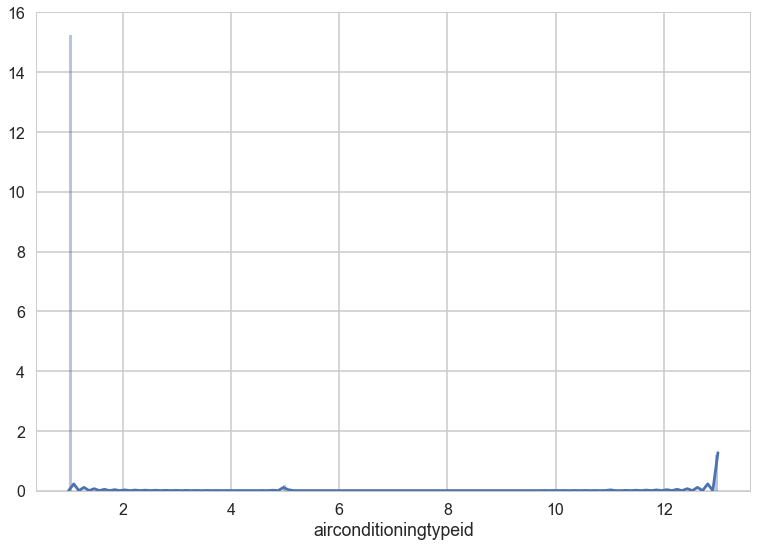

In [55]:

sns.distplot(properties_df.airconditioningtypeid[properties_df.airconditioningtypeid>0], bins = 200)

In [16]:
properties_df.head(3)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN


Get info about train_df:

In [19]:
print(train_df.shape)

(90275, 3)


In [12]:
train_df.columns

Index([u'parcelid', u'logerror', u'transactiondate'], dtype='object')

In [13]:
train_df.dtypes

parcelid             int64
logerror           float64
transactiondate     object
dtype: object

In [15]:
train_df.describe()

,parcelid,logerror
count,9.027500e+04,90275.000000
mean,1.298466e+07,0.011457
std,2.504510e+06,0.161079
min,1.071174e+07,-4.605000
25%,1.155950e+07,-0.025300
50%,1.254734e+07,0.006000
75%,1.422755e+07,0.039200
max,1.629608e+08,4.737000


In [27]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


Investigate variable we are trying to predict:

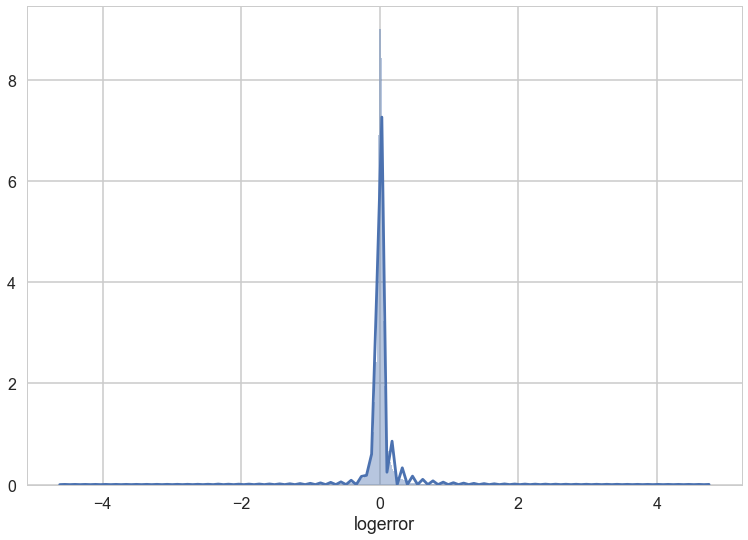

In [41]:
sns.distplot(train_df.logerror, bins = 500)

In [46]:
train_df.transactiondate.dtype

dtype('<M8[ns]')

In [44]:
import datetime
train_df.transactiondate = pd.to_datetime(train_df.transactiondate, format='%Y-%m-%d')

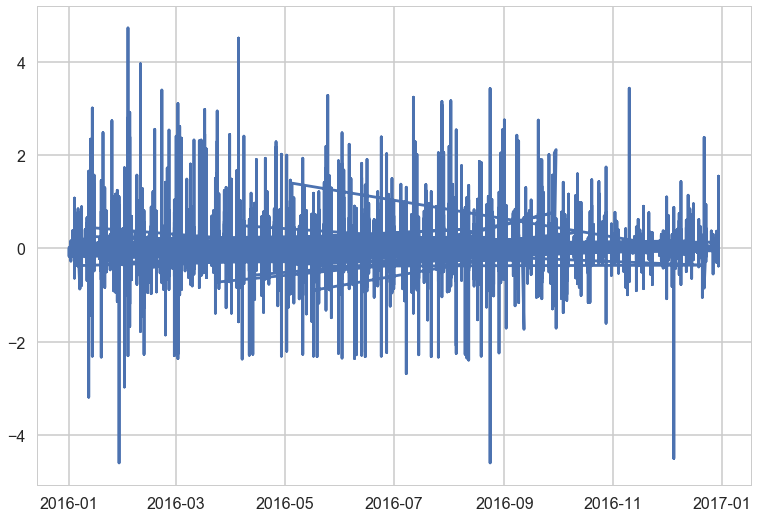

In [49]:
plt.plot(train_df.transactiondate, train_df.logerror)

In [59]:
import math 
math.ceil(.85*properties_df.shape[0])

2537435.0

In [72]:
check = [c for c in properties_df.columns if properties_df[c].isnull().sum() > math.ceil(.25*properties_df.shape[0])]
         

In [73]:
check

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertyzoningdesc',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear']

In [ ]:
properties_df

In [64]:
type(check)

pandas.core.series.Series

In [75]:
new_df = properties_df.drop(check, axis=1)

In [76]:
new_df.shape

(2985217, 25)

In [77]:
new_df.isnull().sum()

parcelid                             0
bathroomcnt                      11462
bedroomcnt                       11450
calculatedbathnbr               128912
calculatedfinishedsquarefeet     55565
finishedsquarefeet12            276033
fips                             11437
fullbathcnt                     128912
latitude                         11437
longitude                        11437
lotsizesquarefeet               276099
propertycountylandusecode        12277
propertylandusetypeid            11437
rawcensustractandblock           11437
regionidcity                     62845
regionidcounty                   11437
regionidzip                      13980
roomcnt                          11475
yearbuilt                        59928
structuretaxvaluedollarcnt       54982
taxvaluedollarcnt                42550
assessmentyear                   11439
landtaxvaluedollarcnt            67733
taxamount                        31250
censustractandblock              75126
dtype: int64

In [79]:
new_df.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
count,2.985217e+06,2.973755e+06,2.973767e+06,2.856305e+06,2.929652e+06,2.709184e+06,2.973780e+06,2.856305e+06,2.973780e+06,2.973780e+06,...,2.973780e+06,2.971237e+06,2.973742e+06,2.925289e+06,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,2.910091e+06
mean,1.332586e+07,2.209143e+00,3.088949e+00,2.299263e+00,1.827162e+03,1.760001e+03,6.048032e+03,2.244165e+00,3.400147e+07,-1.182019e+08,...,2.570461e+03,9.655267e+04,1.475018e+00,1.964262e+03,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,6.048431e+13
std,7.909966e+06,1.077754e+00,1.275859e+00,1.000736e+00,1.819780e+03,9.710610e+02,2.023278e+01,9.912054e-01,2.433812e+05,3.453171e+05,...,7.880711e+02,3.673175e+03,2.840403e+00,2.344132e+01,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,3.249035e+11
min,1.071172e+07,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.037000e+03,1.000000e+00,3.332439e+07,-1.194758e+08,...,1.286000e+03,9.598200e+04,0.000000e+00,1.801000e+03,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,-1.000000e+00
25%,1.164371e+07,2.000000e+00,2.000000e+00,2.000000e+00,1.213000e+03,1.196000e+03,6.037000e+03,2.000000e+00,3.382768e+07,-1.183930e+08,...,2.061000e+03,9.618000e+04,0.000000e+00,1.950000e+03,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,6.037400e+13
50%,1.254509e+07,2.000000e+00,3.000000e+00,2.000000e+00,1.572000e+03,1.539000e+03,6.037000e+03,2.000000e+00,3.400825e+07,-1.181725e+08,...,3.101000e+03,9.637700e+04,0.000000e+00,1.963000e+03,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,6.037572e+13
75%,1.409712e+07,3.000000e+00,4.000000e+00,3.000000e+00,2.136000e+03,2.070000e+03,6.059000e+03,3.000000e+00,3.416186e+07,-1.179495e+08,...,3.101000e+03,9.697400e+04,0.000000e+00,1.981000e+03,1.968890e+05,4.880000e+05,2.015000e+03,3.069180e+05,6.201005e+03,6.059042e+13
max,1.696019e+08,2.000000e+01,2.000000e+01,2.000000e+01,9.525760e+05,2.903450e+05,6.111000e+03,2.000000e+01,3.481965e+07,-1.175543e+08,...,3.101000e+03,3.996750e+05,9.600000e+01,2.015000e+03,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,4.830301e+14


In [80]:
new_df.dtypes

parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
censustractandblock             float64


First, simple model:
Try dropping all columns that are missing >85% of the data.
Then fill the missing data points with the most common value for the feature.


In [81]:
train_df.dtypes

parcelid                    int64
logerror                  float64
transactiondate    datetime64[ns]
dtype: object

In [83]:
combined_df = pd.merge(new_df, train_df, on='parcelid')

In [85]:
new_df.shape

(2985217, 25)

In [86]:
train_df.shape

(90275, 3)

In [84]:
combined_df.shape

(90275, 27)

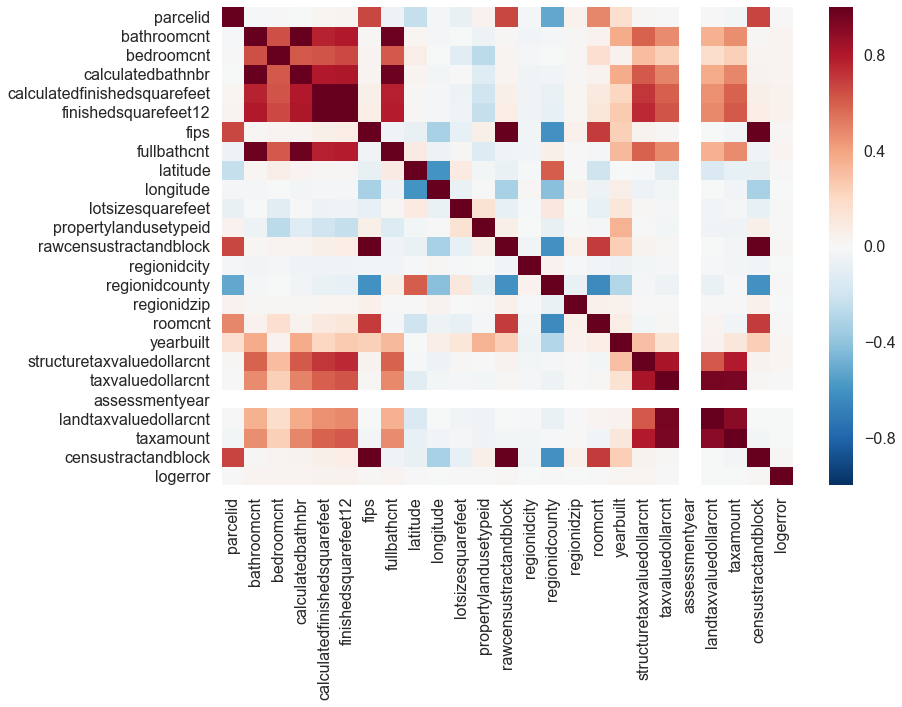

In [89]:
sns.heatmap(combined_df.corr())

In [108]:
corr_df= corr_df.reset_index()

In [109]:
corr_df

,index,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
0,parcelid,1.000000,-0.014073,0.004971,-0.002608,0.016994,0.027694,0.666831,-0.060762,-0.240284,...,0.044127,0.485618,0.167428,0.008460,0.003840,NaN,0.001010,-0.030728,0.676362,0.004837
1,bathroomcnt,-0.014073,1.000000,0.646120,1.000000,0.772553,0.799372,0.009485,0.984130,0.022711,...,0.012265,0.044461,0.368061,0.586641,0.476363,NaN,0.353806,0.461900,0.013078,0.027889
2,bedroomcnt,0.004971,0.646120,1.000000,0.618060,0.632035,0.657599,0.023550,0.613753,0.066331,...,0.014874,0.164484,0.040871,0.305405,0.241329,NaN,0.173205,0.239118,0.028170,0.025467
3,calculatedbathnbr,-0.002608,1.000000,0.618060,1.000000,0.801208,0.805475,0.030662,0.984130,0.024968,...,0.014121,0.031486,0.369543,0.611665,0.497763,NaN,0.371634,0.487320,0.031270,0.029448
4,calculatedfinishedsquarefeet,0.016994,0.772553,0.632035,0.801208,1.000000,1.000000,0.058549,0.780325,0.009321,...,0.022890,0.098244,0.211641,0.716489,0.600018,NaN,0.458550,0.589022,0.058793,0.038784
5,finishedsquarefeet12,0.027694,0.799372,0.657599,0.805475,1.000000,1.000000,0.076336,0.782956,0.010804,...,0.023319,0.120312,0.258530,0.744048,0.626052,NaN,0.480463,0.612496,0.076693,0.041922
6,fips,0.666831,0.009485,0.023550,0.030662,0.058549,0.076336,1.000000,-0.041887,-0.075680,...,0.054007,0.699230,0.241863,0.037981,0.013116,NaN,-0.001048,-0.030628,0.999759,0.008363
7,fullbathcnt,-0.060762,0.984130,0.613753,0.984130,0.780325,0.782956,-0.041887,1.000000,0.079185,...,0.007626,-0.021599,0.322535,0.592410,0.480920,NaN,0.358329,0.476010,-0.040851,0.028845
8,latitude,-0.240284,0.022711,0.066331,0.024968,0.009321,0.010804,-0.075680,0.079185,1.000000,...,0.000205,-0.206495,-0.007475,-0.013548,-0.112394,NaN,-0.147394,-0.078411,-0.070458,0.004915
9,longitude,-0.018132,-0.018347,-0.004879,-0.028204,-0.022369,-0.021118,-0.323956,-0.058946,-0.594097,...,0.036801,-0.050867,0.068977,-0.059807,-0.024682,NaN,-0.004087,-0.035154,-0.325381,-0.003432


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

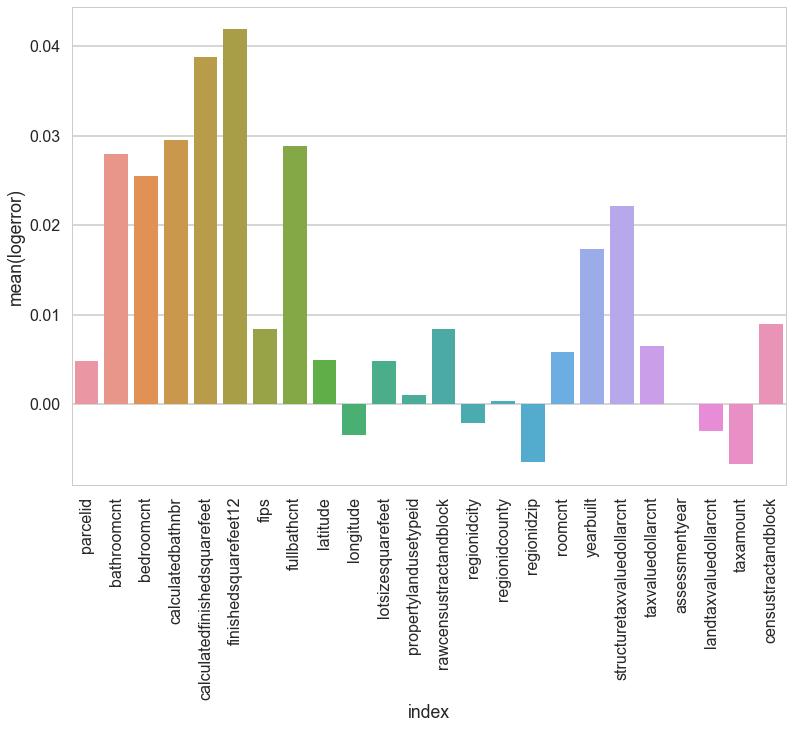

In [117]:
sns.barplot(y = 'logerror', x = 'index', data = corr_df.drop(corr_df.index[24]))
plt.xticks(rotation = 90)

In [91]:
corr_df=combined_df.corr()

In [96]:
corr_df.logerror

parcelid                        0.004837
bathroomcnt                     0.027889
bedroomcnt                      0.025467
calculatedbathnbr               0.029448
calculatedfinishedsquarefeet    0.038784
finishedsquarefeet12            0.041922
fips                            0.008363
fullbathcnt                     0.028845
latitude                        0.004915
longitude                      -0.003432
lotsizesquarefeet               0.004835
propertylandusetypeid           0.001003
rawcensustractandblock          0.008376
regionidcity                   -0.002121
regionidcounty                  0.000341
regionidzip                    -0.006507
roomcnt                         0.005760
yearbuilt                       0.017312
structuretaxvaluedollarcnt      0.022085
taxvaluedollarcnt               0.006508
assessmentyear                       NaN
landtaxvaluedollarcnt          -0.003051
taxamount                      -0.006671
censustractandblock             0.008892
logerror        

In [101]:
corr_df.logerror

parcelid                        0.004837
bathroomcnt                     0.027889
bedroomcnt                      0.025467
calculatedbathnbr               0.029448
calculatedfinishedsquarefeet    0.038784
finishedsquarefeet12            0.041922
fips                            0.008363
fullbathcnt                     0.028845
latitude                        0.004915
longitude                      -0.003432
lotsizesquarefeet               0.004835
propertylandusetypeid           0.001003
rawcensustractandblock          0.008376
regionidcity                   -0.002121
regionidcounty                  0.000341
regionidzip                    -0.006507
roomcnt                         0.005760
yearbuilt                       0.017312
structuretaxvaluedollarcnt      0.022085
taxvaluedollarcnt               0.006508
assessmentyear                       NaN
landtaxvaluedollarcnt          -0.003051
taxamount                      -0.006671
censustractandblock             0.008892
logerror        

ValueError: could not convert string to float: logerror

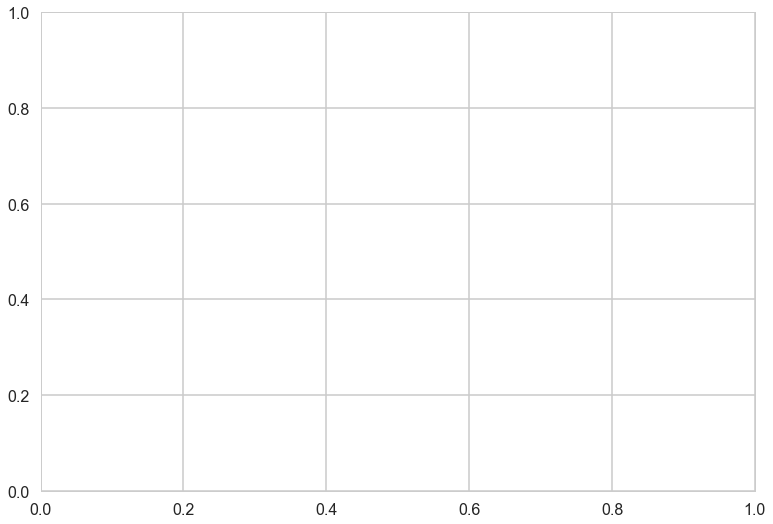

In [99]:
plt.plot(corr_df.logerror)

Get info about sample_submission:

In [18]:
samplesubmission_df.shape

(2985217, 7)

In [20]:
samplesubmission_df.columns

Index([u'ParcelId', u'201610', u'201611', u'201612', u'201710', u'201711',
       u'201712'],
      dtype='object')

In [21]:
samplesubmission_df.dtypes

ParcelId    int64
201610      int64
201611      int64
201612      int64
201710      int64
201711      int64
201712      int64
dtype: object

In [23]:
samplesubmission_df.describe()

,ParcelId,201610,201611,201612,201710,201711,201712
count,2.985217e+06,2985217.0,2985217.0,2985217.0,2985217.0,2985217.0,2985217.0
mean,1.332586e+07,0.0,0.0,0.0,0.0,0.0,0.0
std,7.909966e+06,0.0,0.0,0.0,0.0,0.0,0.0
min,1.071172e+07,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.164371e+07,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.254509e+07,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.409712e+07,0.0,0.0,0.0,0.0,0.0,0.0
max,1.696019e+08,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
samplesubmission_df.head(3)

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
